# Student Performance Anaylsis
## by Nikita Jain

## Preliminary Wrangling

> This dataset is taken from Kaggle from link :https://www.kaggle.com/spscientist/students-performance-in-exams
 This dataset contains information about the marks scored by students in United States in various subjects such as maths,reading and writing Scores. Various other features are also included in the dataset such as parental level of education, whether or not they completed the test course or not and which race/ethnicity or which gender they belong to.

## Part1 : Importing all the necessary libraries

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

## Part2 : Loading the dataset

In [2]:
df=pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Part3: Data Assessment

In [3]:
df.shape # Finding the number of rows and columns in your dataset

(1000, 8)

In [4]:
df.info() #finding info about all the columns in our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe() # finding info about all the quantitative variable in the dataset

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.isnull().sum() # finding out how many null vlaues exist for each particular column.

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

> As we can see from the above result there exists no null values for any of the columns that exists in our dataset

In [7]:
df.duplicated().sum() # finding out if any duplicate rows exists

0

> There exists no duplicate rows in our dataset

## Part 4 : Data Cleaning and add new features

  > Cleaning steps:                                                                                                       
      1) Renaming race/ethnicity as race                                                                                   
      2) Renaming parental level of education as parent_education                                                         
      3) Renamning test preparation course  as test_preparation_course                                                     
      4) Renaming math score ,reading score ,writing score as maths_score,reading_score and writing_score respectively        
  
  > New Columns to be added in the dataset                                                                                 
      1) Total Score of each student                                                                                       
      2) Percentage of each student                                                                                       
      3) Pass/Fail status of each student                                                                                      

### Part4(1) : Creating a copy of original dataset

In [8]:
df_clean=df.copy()
df_clean.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Part 4(2) : Renaming the columns

In [9]:
df_clean.rename(columns = {"race/ethnicity": "race", 
                           "parental level of education":"parent_education", 
                           "test preparation course": "test_preparation_course",
                            "math score":"maths_score",
                            "reading score":"reading_score",
                            "writing score":"writing_score"},inplace=True)


In [10]:
df_clean.head() #testing the above written code

,gender,race,parent_education,lunch,test_preparation_course,maths_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                     1000 non-null object
race                       1000 non-null object
parent_education           1000 non-null object
lunch                      1000 non-null object
test_preparation_course    1000 non-null object
maths_score                1000 non-null int64
reading_score              1000 non-null int64
writing_score              1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Part4(3) : Adding new columns/features in the dataset

 ##### Total score of each student

In [12]:
df_clean['Total_score']= df_clean['maths_score']+df_clean['writing_score']+df_clean['reading_score']
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
gender                     1000 non-null object
race                       1000 non-null object
parent_education           1000 non-null object
lunch                      1000 non-null object
test_preparation_course    1000 non-null object
maths_score                1000 non-null int64
reading_score              1000 non-null int64
writing_score              1000 non-null int64
Total_score                1000 non-null int64
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


##### Percentage of each student

In [13]:
df_clean['percentage']=df_clean['Total_score']/3
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
gender                     1000 non-null object
race                       1000 non-null object
parent_education           1000 non-null object
lunch                      1000 non-null object
test_preparation_course    1000 non-null object
maths_score                1000 non-null int64
reading_score              1000 non-null int64
writing_score              1000 non-null int64
Total_score                1000 non-null int64
percentage                 1000 non-null float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.2+ KB


In [14]:
df_clean.head()

,gender,race,parent_education,lunch,test_preparation_course,maths_score,reading_score,writing_score,Total_score,percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


##### Pass/Fail Result of each student

In [15]:
def result(percentage):
    if percentage >=33:
        return "PASS"
    else:
        return "FAIL"
    
df_clean['result']=df_clean['percentage'].apply(result)
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
gender                     1000 non-null object
race                       1000 non-null object
parent_education           1000 non-null object
lunch                      1000 non-null object
test_preparation_course    1000 non-null object
maths_score                1000 non-null int64
reading_score              1000 non-null int64
writing_score              1000 non-null int64
Total_score                1000 non-null int64
percentage                 1000 non-null float64
result                     1000 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 86.0+ KB
None


In [16]:
df_clean.head()

,gender,race,parent_education,lunch,test_preparation_course,maths_score,reading_score,writing_score,Total_score,percentage,result
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,PASS
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,PASS
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,PASS
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,PASS
4,male,group C,some college,standard,none,76,78,75,229,76.333333,PASS


In [17]:
df_clean.to_csv('student_final_data.csv')

### What is the structure of your dataset?

    This dataset contains information about the marks scored by students in United States in various subjects such as         maths,reading and writing Scores. Various other features are also included in the dataset such as parental level of       education, whether or not they completed the test course or not and which race/ethnicity or which gender they             belong to. Various new features were also added to support the anaylsis such as total score , percentage and 
    the final result of the student.

### What is/are the main feature(s) of interest in your dataset?

     The various features that can help to carry out this investigation will be gender, race, parent_education ,                  marks in all the subjects and the final result of the student.

### Various questions that can be addressed in the anaylsis

    1. Which gender performs better in all the test results?                                                               
    2. Does parental education plays an impotant role in determining score results of students?                               3. Which class or group of society perfroms better in the exams?                    
    4. Which other factors such as lunch or test completion affect the students scores?
    5. What are the average marks in all subjects and how many students have actually passed or failed?

## Part 5 : Data Visualization and Analysis

### Part 5(1): Univariate Exploration



####  1.  Average marks in all three subjects which are maths,reading and writing. 

In [18]:
def hist_box(subject): #function to plot histogram and boxplot of given feature
    avg= str(df_clean[subject].mean())
    print("Average in {sub} is".format(sub=subject)+" "+avg)
    plt.figure(figsize=(10,4), dpi=100) 
  
    
    plt.subplot(1, 2, 1);
    plt.hist(df_clean[subject]);
    plt.xlabel("{sub}".format(sub=subject));
    plt.ylabel("Frequency of marks");
    plt.title("Distribution of {sub}".format(sub=subject));


    plt.subplot(1, 2, 2);
    plt.boxplot(df_clean[subject],patch_artist=True);
    plt.xlabel("{sub}".format(sub=subject));
    plt.ylabel("Marks");
    plt.title("Distribution of {sub}".format(sub=subject));
    plt.show();

##### Distribution of scores in all subjects

Average in maths_score is 66.089


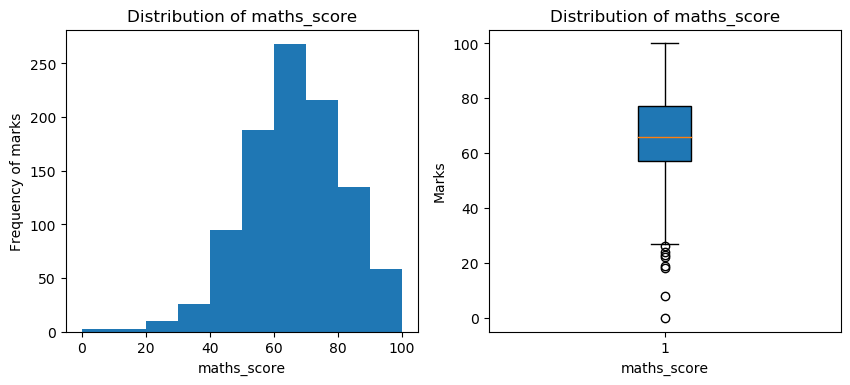

In [19]:
hist_box("maths_score") # histogram and box-plot of maths marks


 > As we can see from above drawn histogram and box plot average marks for maths subject are 67 and maximum of students have scored between 60-80 marks and few students have also scored below 25 marks and failed in the subject.

Average in reading_score is 69.169


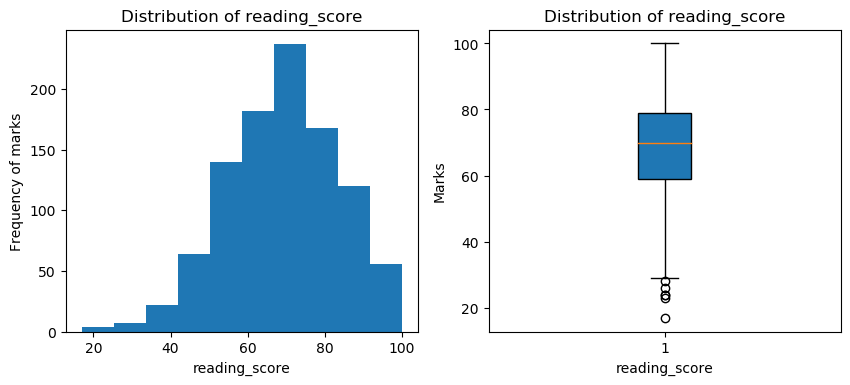

In [20]:
hist_box("reading_score") # histogram and box-plot of reading marks

>As we can see from above drawn histogram and box plot that average marks in reading score is 69 and maximum of students have scored between 60-80 marks and few students have also scored below 25 marks in the subject.

Average in writing_score is 68.054


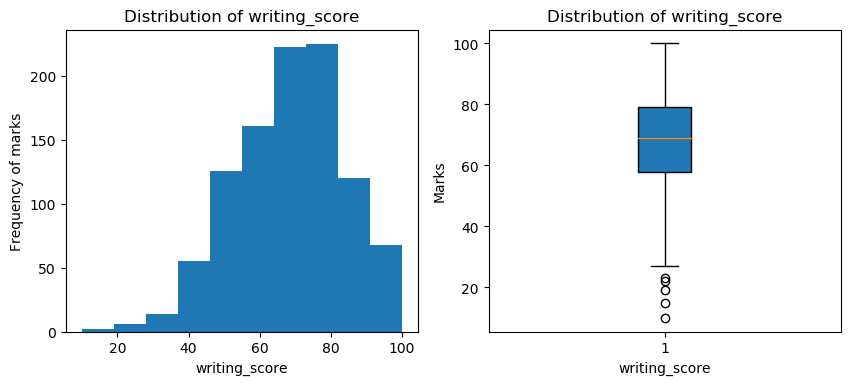

In [21]:
hist_box("writing_score") # histogram and box-plot of writing marks

>As we can see from above drawn histogram and box plot that average marks in writing score is 68 and maximum of students have scored between 60-80 marks and few students have also scored below 25 marks in the subject.

#### 2. Anaylsis of other categorical variables.

In [22]:
# function to plot bar plot for passed categrical variable.
def categorical_plot(variable):
    plt.figure(figsize=(6,4), dpi=80)
    count1=df_clean.groupby(variable).size().sort_values()
    print(count1)
    sns.barplot(y=count1.index, x=count1,data=df_clean)
    plt.xlabel("Frequeny")
    plt.ylabel("{vari}".format(vari=variable))
    plt.title(variable)
    plt.show()


parent_education
master's degree        59
bachelor's degree     118
some high school      179
high school           196
associate's degree    222
some college          226
dtype: int64


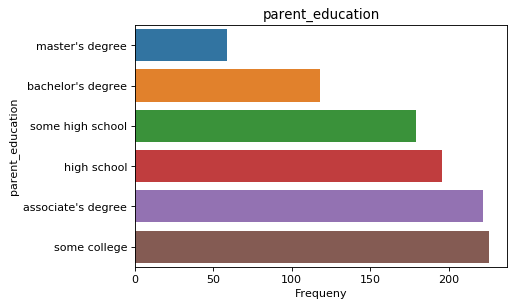

In [23]:
# Anaylsis of parent level of education
categorical_plot("parent_education")

> As we can see from above plot majority of parents just went to some college whereas very less parents have prursued master's or bachelors degree.

race
group A     89
group E    140
group B    190
group D    262
group C    319
dtype: int64


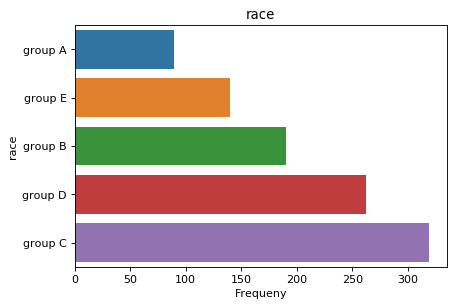

In [24]:
# anaylsis of race/ethnicity of the students
categorical_plot('race')

> From the visual drawn above it is clear that a majority of people belong to Group C and minimum number of people belong to group A. This can be  considered as an important factor in deciding which group of people performs better in exams.

test_preparation_course
completed    358
none         642
dtype: int64


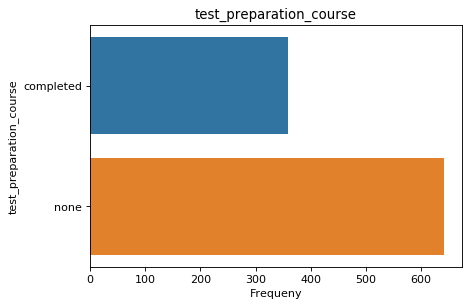

In [25]:
# anaylsis of how many students practiced test_preparation course and the students who didn't.
categorical_plot('test_preparation_course')

> From the above graph it can be interpreted that most of students have not taken any test preparation course and gave their exams without any preparation course whereas 358 students took and completed the test prepararion course before appearing for their examinations.

##### Anaylsis of Results of Students

Percentage of students who have passed 98.5
Percentage of students who have failed 1.5


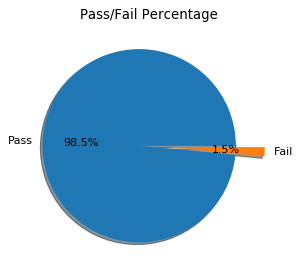

In [26]:
# anaylsing how many students have passed and failed
plt.figure(figsize=(8,4), dpi=80)
labels=['Pass','Fail']
pass_student=(df_clean[df_clean['result']=='PASS']['result'].count())*100/df_clean.shape[0]
fail_student=(df_clean[df_clean['result']=='FAIL']['result'].count())*100/df_clean.shape[0]
print("Percentage of students who have passed "+str(pass_student))
print("Percentage of students who have failed "+str(fail_student))
ex=(0.1,0.2)
result1=[pass_student,fail_student]
plt.pie(result1,labels=labels,autopct='%1.1f%%',shadow=True,explode=ex);
plt.title("Pass/Fail Percentage");

> It can be depicted from above pie chart that a majority of students have passed in all the subjects whereas out of 1000 students only 15 students have failed in clearing the examinations.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The main features of interest in this dataset is gender, race and parental level of education and whether or not the student completed the test course or has taken none. These are  the important factors in deciding how the students perform in their examinations. No in univariate explorations there was no need to apply any transformations.Also,we can observe that average marks in each subject lies around 65-70 marks and majority of students have passed in all the subjects.



###  Part 5(2): Bivariate Exploration


####   1.  Anaylsis of marks scored  by each gender in each subject.

Maths Score Average based on Gender
gender
female    63.633205
male      68.728216
Name: maths_score, dtype: float64

Reading Score Average based on Gender
gender
female    72.608108
male      65.473029
Name: reading_score, dtype: float64

Writing Score Average based on Gender
gender
female    72.467181
male      63.311203
Name: writing_score, dtype: float64



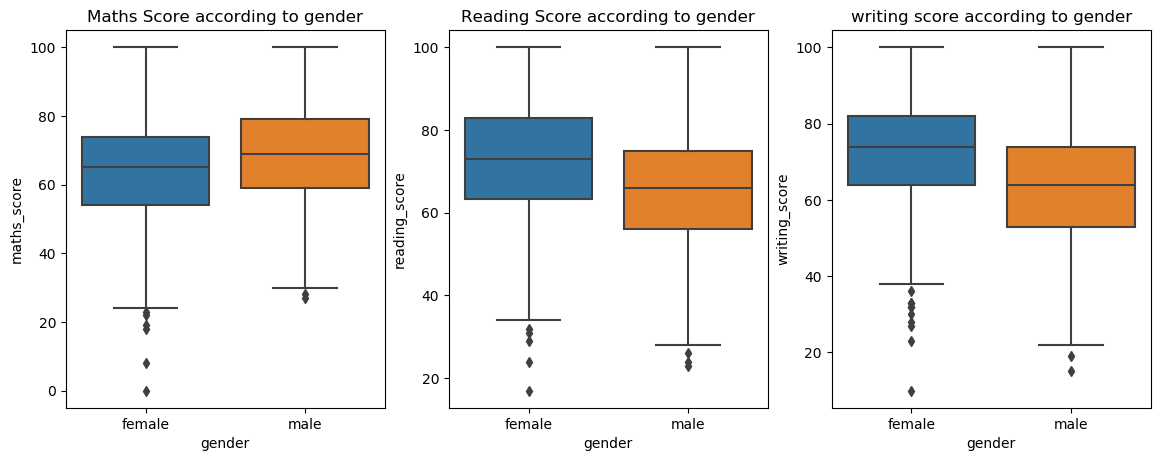

In [27]:
    plt.figure(figsize=(14,5), dpi=100)
    plt.subplot(1, 3, 1);
    
    #plot for maths score
    count=df_clean.groupby('gender')['maths_score'].mean()
    print("Maths Score Average based on Gender")
    print(count)
    print()
    sns.boxplot(x='gender', y='maths_score',data=df_clean)
    plt.title("Maths Score according to gender");

    #plot for reading score
    plt.subplot(1, 3, 2);
    sns.boxplot(x='gender', y='reading_score',data=df_clean)
    count=df_clean.groupby('gender')['reading_score'].mean()
    print("Reading Score Average based on Gender")
    print(count)
    print()
    plt.title("Reading Score according to gender");
    
    #plot for writing score
    plt.subplot(1, 3, 3);
    sns.boxplot(x='gender', y='writing_score',data=df_clean)
    count=df_clean.groupby('gender')['writing_score'].mean()
    print("Writing Score Average based on Gender")
    print(count)
    print()
    plt.title("writing score according to gender");
    
    plt.show();
    

> As we can see from above plot average male gender tends to perform better in maths as compared to reading and writing as compared to female gender. The average marks obtained by female gender is greater than average score obtained by male gender in both reading and writing.

#### 2. Corrleation between Scores in different Subjects

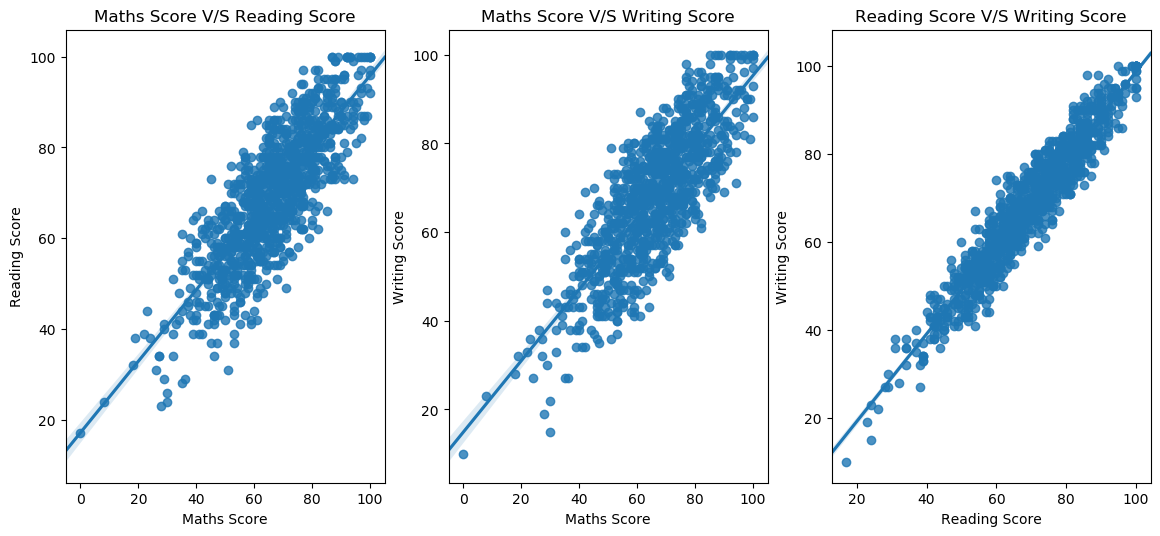

In [28]:
    plt.figure(figsize=(14,6), dpi=100)
    plt.subplot(1, 3, 1);
    
    sns.regplot(x='maths_score', y='reading_score',data=df_clean)
    plt.xlabel("Maths Score");
    plt.ylabel("Reading Score")
    plt.title("Maths Score V/S Reading Score");


    plt.subplot(1, 3, 2);
    sns.regplot(x='maths_score', y='writing_score',data=df_clean)
    plt.xlabel("Maths Score")
    plt.ylabel("Writing Score")
    plt.title("Maths Score V/S Writing Score");
    
    plt.subplot(1, 3, 3);
    sns.regplot(x='reading_score', y='writing_score',data=df_clean)
    plt.xlabel("Reading Score")
    plt.ylabel("Writing Score")
    plt.title("Reading Score V/S Writing Score");
    plt.show();
    

> It can be concluded from above plot that all scores tend to follow a positive correlation with each other, if marks in one subject increases the marks in other subject also increases.

#### 3. Distribution of Scores Based on Race/Ethincity

Maths Score Average based on Race/Ethnicity
race
group A    61.629213
group B    63.452632
group C    64.463950
group D    67.362595
group E    73.821429
Name: maths_score, dtype: float64

Reading Score Average based on Race/Ethncity
race
group A    64.674157
group B    67.352632
group C    69.103448
group D    70.030534
group E    73.028571
Name: reading_score, dtype: float64

Writing Score Average based on Race/Ethnicity
race
group A    62.674157
group B    65.600000
group C    67.827586
group D    70.145038
group E    71.407143
Name: writing_score, dtype: float64



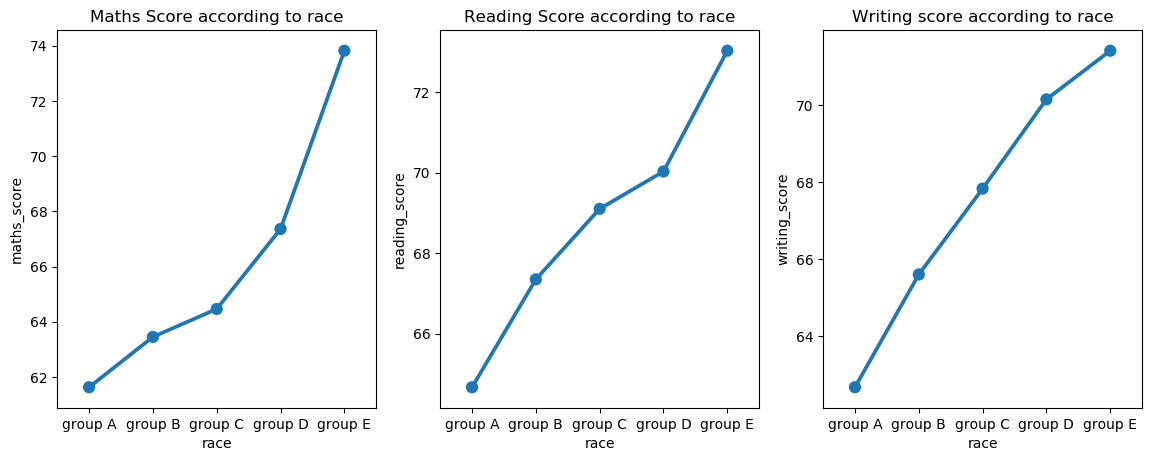

In [29]:
    plt.figure(figsize=(14,5), dpi=100)
    color=sns.color_palette()[0]
    
    #plot for maths score
    plt.subplot(1, 3, 1);
    count=df_clean.groupby('race')['maths_score'].mean().sort_values()
    print("Maths Score Average based on Race/Ethnicity")
    print(count)
    print()
    sns.pointplot(x=count.index, y=count,data=df_clean,color=color)
    plt.title("Maths Score according to race");

    # plot for reading score
    plt.subplot(1, 3, 2);
    count=df_clean.groupby('race')['reading_score'].mean().sort_values()
    print("Reading Score Average based on Race/Ethncity")
    print(count)
    print()
    sns.pointplot(x=count.index, y=count,data=df_clean,color=color)
    plt.title("Reading Score according to race");
    
    #plot for writing score
    plt.subplot(1, 3, 3);
    count=df_clean.groupby('race')['writing_score'].mean().sort_values()
    print("Writing Score Average based on Race/Ethnicity")
    print(count)
    print()
    sns.pointplot(x=count.index, y=count,data=df_clean,color=color)
    plt.title("Writing score according to race");
    
    plt.show();
    

> We can see from visualised plot that students belonging to group E tend to perform better in all subjects ,then comes group D followed by group A,B and C.We can see an observable amount of difference in marks of students of group E and group A

#### 4. Distribution of scores in all subjects based on test-prepration course

Maths Score V/s test_preparation_course
test_preparation_course
none         64.077882
completed    69.695531
Name: maths_score, dtype: float64

Reading Score Average V/s test_preparation_course
test_preparation_course
none         66.534268
completed    73.893855
Name: reading_score, dtype: float64

Writing Score V/s test_preparation_course
test_preparation_course
none         64.504673
completed    74.418994
Name: writing_score, dtype: float64



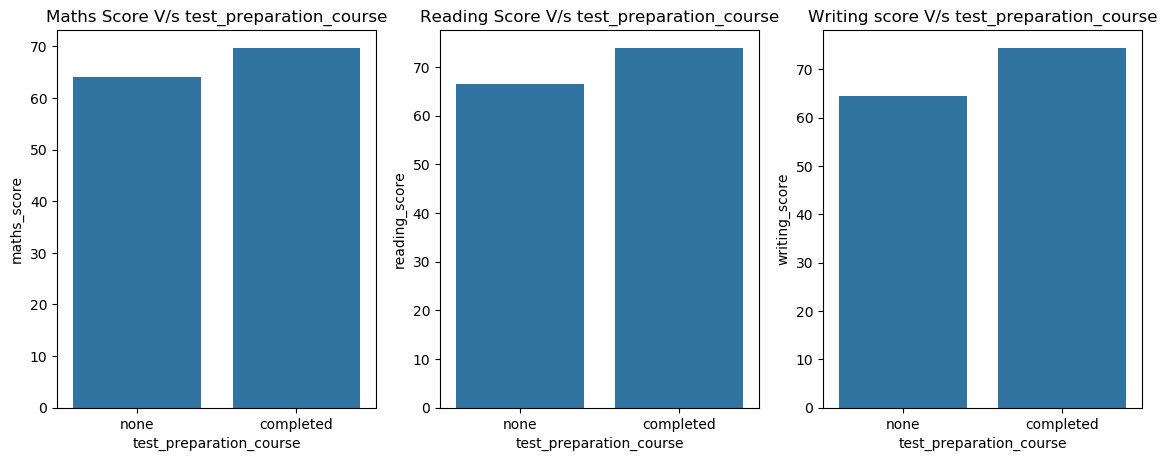

In [30]:
    plt.figure(figsize=(14,5), dpi=100)
    color=sns.color_palette()[0]
    
    #plot for maths score
    plt.subplot(1, 3, 1);
    count=df_clean.groupby('test_preparation_course')['maths_score'].mean().sort_values()
    print("Maths Score V/s test_preparation_course")
    print(count)
    print()
    sns.barplot(x=count.index,y=count,data=df_clean,color=color)
    plt.title("Maths Score V/s test_preparation_course");

    #plot for reading score
    plt.subplot(1, 3, 2);
    count=df_clean.groupby('test_preparation_course')['reading_score'].mean().sort_values()
    print("Reading Score Average V/s test_preparation_course")
    print(count)
    print()
    sns.barplot(x=count.index, y=count,data=df_clean,color=color)
    plt.title("Reading Score V/s test_preparation_course");

    # plot for writing score
    plt.subplot(1, 3, 3);
    count=df_clean.groupby('test_preparation_course')['writing_score'].mean().sort_values()
    print("Writing Score V/s test_preparation_course")
    print(count)
    print()
    sns.barplot(x=count.index, y=count,data=df_clean,color=color)
    plt.title("Writing score V/s test_preparation_course");
    
    plt.show();
    

> The conclusion that can be drawn from above plot is that students who have taken the test_preparation course tend to perform better than those students who have not taken the test preparation course.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In this section of exploration various interesting observations can be drawn out. Firstly female gender tend to perfrom better in reading and writing whereas male gender tend to perform better in subject of maths. Secondly scores in all subjects tend to have a positive correlation among each other. We can also see a gap in scores between students belonging to each grup/race and scores are also impacted by whether or not the student has taken the preparation course or not.



### Part 5(3): Multivariate Exploration

#### 1. Average scores in each subject based on gender and race

Maths Score by gender and race
   gender     race  maths_score
0  female  group A    58.527778
1  female  group B    61.403846
2  female  group C    62.033333
5    male  group A    63.735849
3  female  group D    65.248062
6    male  group B    65.930233
7    male  group C    67.611511
8    male  group D    69.413534
4  female  group E    70.811594
9    male  group E    76.746479

Reading Score Average by gender and race
   gender     race  reading_score
5    male  group A      61.735849
6    male  group B      62.848837
7    male  group C      65.424460
8    male  group D      66.135338
0  female  group A      69.000000
9    male  group E      70.295775
1  female  group B      71.076923
2  female  group C      71.944444
3  female  group D      74.046512
4  female  group E      75.840580

Writing Score by gender and race
   gender     race  writing_score
5    male  group A      59.150943
6    male  group B      60.220930
7    male  group C      62.712230
8    male  group D      65.4135

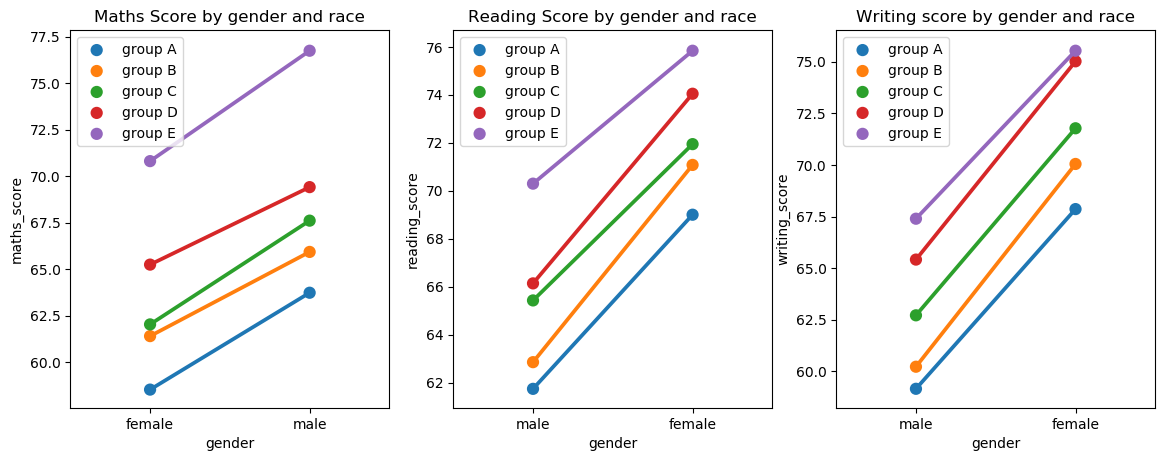

In [31]:
    plt.figure(figsize=(14,5), dpi=100)
    color=sns.color_palette()[0]
    
    #plot for maths score
    plt.subplot(1, 3, 1);
    count=df_clean.groupby(['gender','race'],as_index=False)['maths_score'].mean().sort_values(by='maths_score')
    print("Maths Score by gender and race")
    print(count)
    print()
    sns.pointplot(x='gender',y='maths_score',hue='race',data=count)
    plt.title("Maths Score by gender and race");
    plt.legend(loc=2)


    # plot for reading score
    plt.subplot(1, 3, 2);
    count=df_clean.groupby(['gender','race'],as_index=False)['reading_score'].mean().sort_values(by='reading_score')
    print("Reading Score Average by gender and race")
    print(count)
    print()
    sns.pointplot(x='gender', y='reading_score',hue='race',data=count)
    plt.title("Reading Score by gender and race");
    plt.legend(loc=2)
    
    #plot for writing score
    plt.subplot(1, 3, 3);
    count=df_clean.groupby(['gender','race'],as_index=False)['writing_score'].mean().sort_values(by='writing_score')
    print("Writing Score by gender and race")
    print(count)
    print()
    sns.pointplot(x='gender', y='writing_score',hue='race',data=count)
    plt.title("Writing score by gender and race");
    plt.legend(loc=2)
    
    plt.show();
    

> The conclusion that can be drawn from above plot females belonging to group E tend to perform better in reading and writing as compared to males belonging to Group E . Males from all groups perfroms better in maths as compared to females of same group. The order of scores obtained can be summarized as follows:
Group E > Group D > Group C > Group B > Group A

#### 2. Average Scores by test preparation course and Pass/Fail Result

Maths Score by test course and result
  test_preparation_course result  maths_score
1                    none   FAIL    23.933333
2                    none   PASS    65.038278
0               completed   PASS    69.695531

Reading Score Average by test course and result
  test_preparation_course result  reading_score
1                    none   FAIL      29.733333
2                    none   PASS      67.414673
0               completed   PASS      73.893855

Writing Score by test course and result
  test_preparation_course result  writing_score
1                    none   FAIL      26.600000
2                    none   PASS      65.411483
0               completed   PASS      74.418994



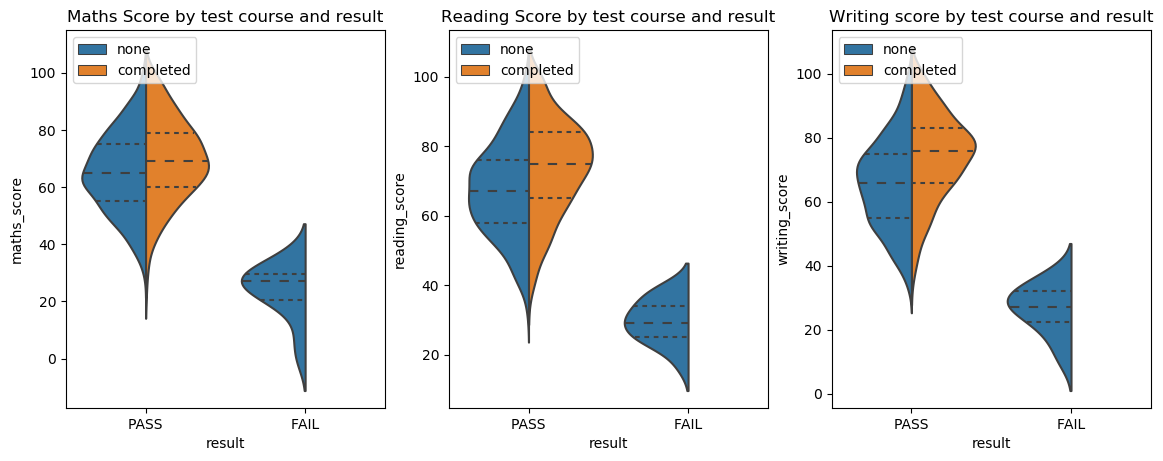

In [32]:
    plt.figure(figsize=(14,5), dpi=100)
    color=sns.color_palette()[0]
    
    # plot for maths score
    plt.subplot(1, 3, 1);
    count=df_clean.groupby(['test_preparation_course','result'],as_index=False)['maths_score'].mean().sort_values(by='maths_score')
    print("Maths Score by test course and result")
    print(count)
    print()
    sns.violinplot(x='result',y='maths_score',hue='test_preparation_course',data=df_clean,inner='quartile',split=True)
    plt.title("Maths Score by test course and result");
    plt.legend(loc=2)


    # plot for reading score
    plt.subplot(1, 3, 2);
    count=df_clean.groupby(['test_preparation_course','result'],as_index=False)['reading_score'].mean().sort_values(by='reading_score')
    print("Reading Score Average by test course and result")
    print(count)
    print()
    sns.violinplot(x='result', y='reading_score',hue='test_preparation_course',data=df_clean,inner="quartile",split=True)
    plt.title("Reading Score by test course and result");
    plt.legend(loc=2)

    #plot for writing score
    plt.subplot(1, 3, 3);
    count=df_clean.groupby(['test_preparation_course','result'],as_index=False)['writing_score'].mean().sort_values(by='writing_score')
    print("Writing Score by test course and result")
    print(count)
    print()
    sns.violinplot(x='result', y='writing_score',hue='test_preparation_course',data=df_clean,inner="quartile",split=True)
    plt.title("Writing score by test course and result");
    plt.legend(loc=2)
    
    plt.show();
    

> As it can be visualised from above plot that no student that have completed the test preparation course has failed. Only those have failed in their examinations who didn't take up test preparation course. The test preparation course seemed to be an deciding factor in determining the result of the student.It can also be noted that students who have taken the test preparation course tend to have scored higher marks in all subjects.

#### 3 . Total Score and percentage by result and parental education

Results by total score and parent education
     parent_education result  Total_score
8    some high school   FAIL    73.000000
3         high school   FAIL    80.200000
6        some college   FAIL    85.750000
0  associate's degree   FAIL    95.000000
4         high school   PASS   192.146597
9    some high school   PASS   198.839080
7        some college   PASS   207.585586
1  associate's degree   PASS   209.221719
2   bachelor's degree   PASS   215.771186
5     master's degree   PASS   220.796610


Results by Percentage and parent education
     parent_education result  percentage
8    some high school   FAIL   24.333333
3         high school   FAIL   26.733333
6        some college   FAIL   28.583333
0  associate's degree   FAIL   31.666667
4         high school   PASS   64.048866
9    some high school   PASS   66.279693
7        some college   PASS   69.195195
1  associate's degree   PASS   69.740573
2   bachelor's degree   PASS   71.923729
5     master's degree   PASS   73.59887

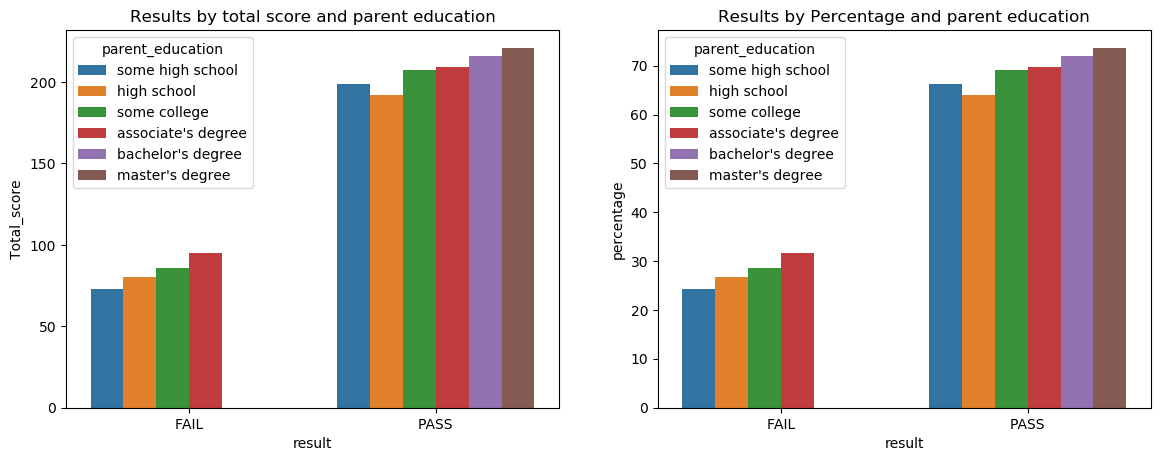

In [33]:
plt.figure(figsize=(14,5), dpi=100)
plt.subplot(1,2,1)
count=df_clean.groupby(['parent_education','result'],as_index=False)['Total_score'].mean().sort_values(by='Total_score');
print("Results by total score and parent education")
print(count)
print()
sns.barplot(x='result',y='Total_score',hue='parent_education',data=count);
plt.title("Results by total score and parent education");

plt.subplot(1,2,2)
count=df_clean.groupby(['parent_education','result'],as_index=False)['percentage'].mean().sort_values(by='percentage');
print()
print("Results by Percentage and parent education")
print(count)
sns.barplot(x='result',y='percentage',hue='parent_education',data=count);
plt.title("Results by Percentage and parent education");

> It can visualised from above plot that students whose parents have completed masters/bachelors degree in education have not failed in examinations and highest total score is obtained by students whose parents have completed master's degree followed by students whose parents have completed bachelors degree . Lowest total score and percentage have been recorded by students whose parents have gone to some high school or just completed high school

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this section of multivariate exploration many interesting relationships were observed that how the marks scored by students depends upon which class they belong to, which gender are they, have they completed the test preparation course or not and what is maximum education their parents have pursued. It was seen that no students who have completed the test preparation course have failed and no students have also failed whose parents have pursued masters/bachelors degree.

### Conclusion

#### From the above analysis carried out on Student performance data it can be concluded that:
    1.Male gender tends to perform better in subject maths and female gender tends to perform better in other subjects.  
    
    2. Group E students tend to perform better in all subjects as compared to other groups and Group A students                  performance is the lowest among all other groups. 
    
    3. Out of 1000 students only 15 students have failed making the fail percentage as 1.5% and pass percentage 98.5%.
    
    4. Test Preparation course also plays a major role in deciding the result of the student.Every student who has                completed the test preparation course have passed in all subjects. All those students have failed who have not            taken the test preparation course.  
    
    5. Parent education can also be considered as an important criteria in determining the results of the students.              Students whose parents have completed master's or bachleor's degree have not failed in any subject. Lowest pass            percentage is recorded by students whose parents have just gone to some high school.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

### References :

https://www.kaggle.com/spscientist/students-performance-in-exams

https://seaborn.pydata.org/generated/seaborn.violinplot.html

https://pythontic.com/visualization/charts/piechart

https://stackoverflow.com/questions/44413020/how-to-specify-legend-position-in-matplotlib-in-graph-coordinates

https://stackoverflow.com/questions/37360568/python-organisation-of-3-subplots-with-matplotlib

https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python